# **Bottle Deep Learning Version**

**Benedictus Bayu Pramudhito**

**Batch size = 128**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)')))

bottle.csv
References
Untitled0.ipynb
Week_1_Python_1.ipynb
heart.csv
pima-indians-diabetes.csv
sonar.csv
housing.csv
winequality-white.csv
auto.csv
sales.csv
birth.csv
shampoo.csv
daily-min-temperatures.csv
Quiz
customer.csv
iris.csv
iris (1).csv
Bootcamp Images
parkinsons
numbers_dataset
bottle-updated.csv
auto-mpg.csv
auto (1).csv


In [ ]:
df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/bottle-updated.csv')
df.head()

,Unnamed: 0,Depthm,T_degC,Salnty
0,0,0,10.50,33.440
1,1,8,10.46,33.440
2,2,10,10.46,33.437
3,3,19,10.45,33.420
4,4,20,10.45,33.421


In [ ]:
df.shape

(864863, 4)

In [ ]:
df.dtypes

Unnamed: 0      int64
Depthm          int64
T_degC        float64
Salnty        float64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,864863.0,432431.000000,249664.587267,0.000,216215.500,432431.000,648646.5000,864862.000
Depthm,864863.0,226.831951,316.050259,0.000,46.000,125.000,300.0000,5351.000
T_degC,853900.0,10.799677,4.243825,1.440,7.680,10.060,13.8800,31.140
Salnty,817509.0,33.840350,0.461843,28.431,33.488,33.863,34.1969,37.034


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head()

,Depthm,T_degC,Salnty
0,0,10.50,33.440
1,8,10.46,33.440
2,10,10.46,33.437
3,19,10.45,33.420
4,20,10.45,33.421


In [ ]:
print(df.dtypes)
df.shape

Depthm      int64
T_degC    float64
Salnty    float64
dtype: object


(864863, 3)

In [ ]:
nulls = df.isnull().sum().sort_values(ascending=False)
percent = round(nulls/len(df)*100, 2)

df_null = pd.DataFrame(columns=['Features', 'Total', 'Percent'])
df_null['Features'] = nulls.index
df_null['Total'] = nulls.values
df_null['Percent'] = percent.values

df_null

,Features,Total,Percent
0,Salnty,47354,5.48
1,T_degC,10963,1.27
2,Depthm,0,0.00


In [ ]:
#Isi missing values
for i in df.columns:
  if df[i].isnull().sum() > 0:
    df[i].fillna(df[i].mode().mean(), inplace=True)
    print('Filled', i)

Filled T_degC
Filled Salnty


In [ ]:
#Cek ulang missing valuesnya
nulls = df.isnull().sum().sort_values(ascending=False)
percent = round(nulls/len(df)*100, 2)

df_null = pd.DataFrame(columns=['Features', 'Total', 'Percent'])
df_null['Features'] = nulls.index
df_null['Total'] = nulls.values
df_null['Percent'] = percent.values

df_null

,Features,Total,Percent
0,Salnty,0,0.0
1,T_degC,0,0.0
2,Depthm,0,0.0


In [ ]:
df.dtypes

Depthm      int64
T_degC    float64
Salnty    float64
dtype: object

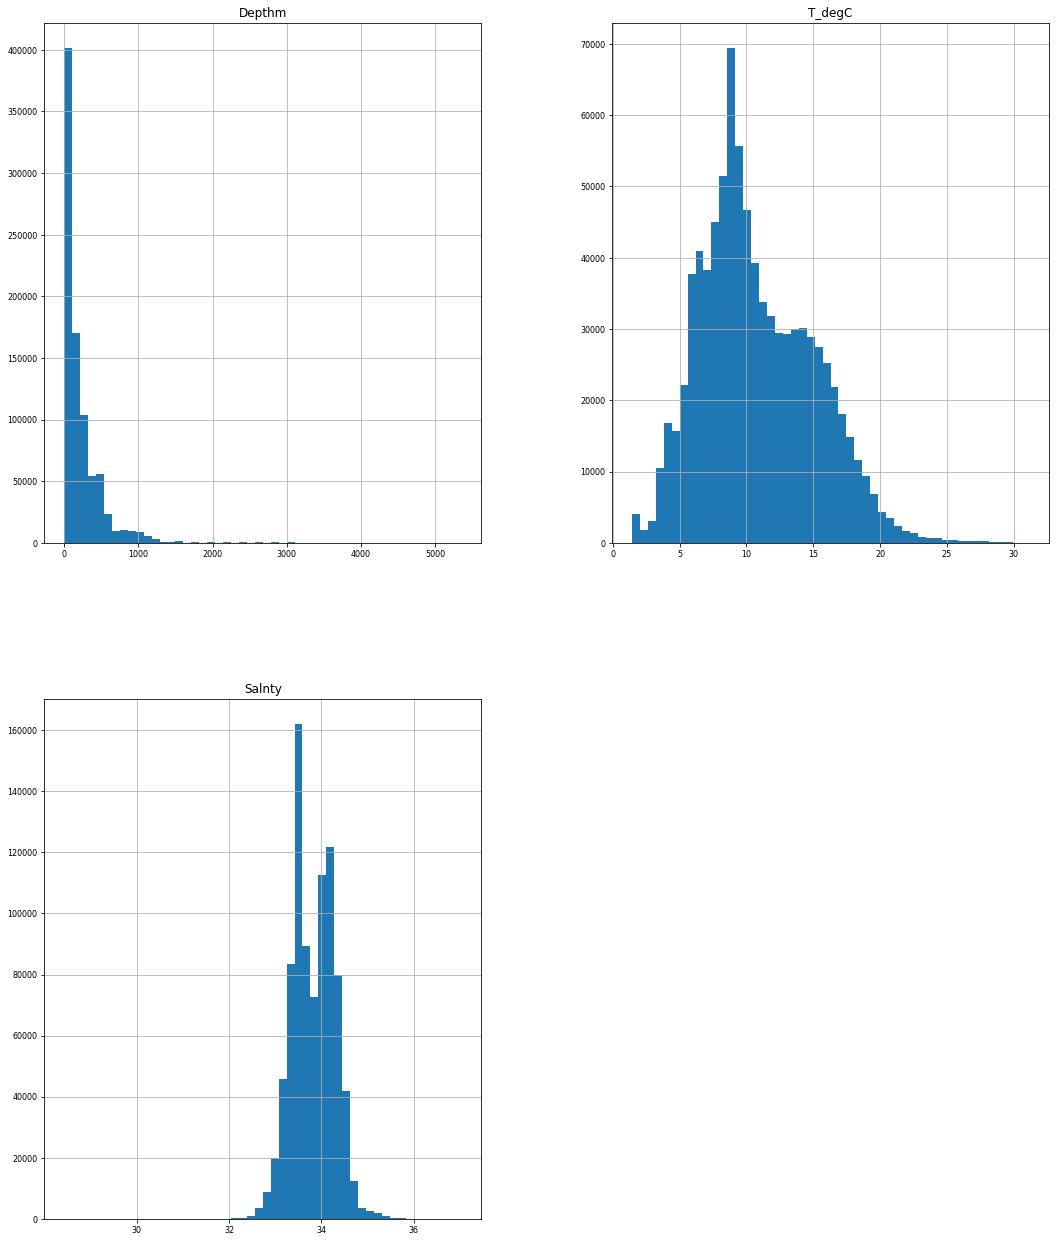

In [ ]:
df_numbers = df.select_dtypes(include=['float64', 'int64'])

df_numbers.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

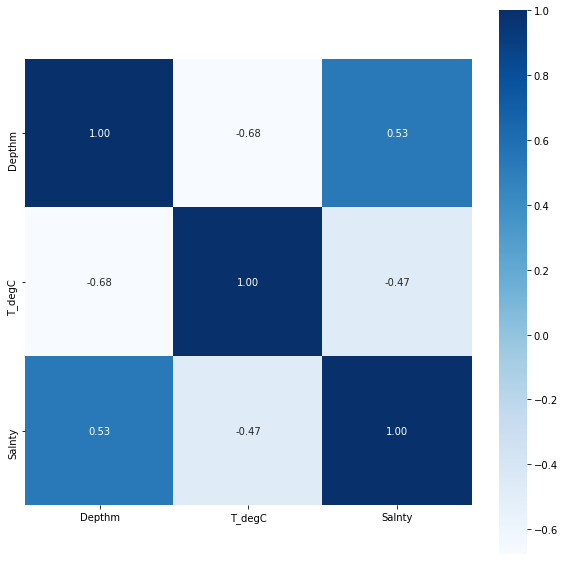

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10}, cbar=True, square=True, fmt='.2f', cmap='Blues')
plt.show()

## **Machine Learning Model**

### **Linear Regression**

**Feature Engineering**

In [ ]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X = df.drop(['Salnty'], axis=1)
y = df['Salnty']

In [ ]:
stdr = StandardScaler()

X = stdr.fit_transform(X.values)
y = stdr.fit_transform(df['Salnty'].values.reshape(-1, 1)).flatten()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((648647, 2), (216216, 2), (648647,), (216216,))

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

predict_lm = linreg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predict_lm)
mae = mean_absolute_error(y_test, predict_lm)
r2 = r2_score(y_test, predict_lm)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_lm)))

MSE (Mean Squared Error)       : 0.7004045653886645
MAE (Mean Absolute Error)      : 0.6007392481489782
r^2 score                      : 0.3013722059652524
RMSE (Root Mean Squared Error  : 0.8369017656742423


## **Deep Learning Model**

In [ ]:
def plot_loss_new(history):
  history_df = pd.DataFrame(history.history)

  min_loss_index = history_df[history_df['loss']==min(history_df['loss'])].index.values
  min_loss = history_df.loc[min_loss_index]['loss']
  min_val_loss_index = history_df[history_df['val_loss']==min(history_df['val_loss'])].index.values
  min_val_loss = history_df.loc[min_val_loss_index]['val_loss']

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(min_loss_index, min_loss, 'o', c='k', ms=4, label='min loss')
  plt.plot(min_val_loss_index, min_val_loss, 'o', c='k', ms=4, label='min val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  print('Minimum Loss             :', min_loss)
  print()
  print('Minimum Validation Loss  :', min_val_loss)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Epoch 1/50
5068/5068 [==============================] - 5s 1ms/step - loss: 0.4527 - val_loss: 0.4164
Epoch 2/50
5068/5068 [==============================] - 5s 984us/step - loss: 0.4078 - val_loss: 0.4080
Epoch 3/50
5068/5068 [==============================] - 5s 985us/step - loss: 0.4031 - val_loss: 0.4054
Epoch 4/50
5068/5068 [==============================] - 5s 977us/step - loss: 0.4013 - val_loss: 0.4045
Epoch 5/50
5068/5068 [==============================] - 5s 971us/step - loss: 0.4005 - val_loss: 0.4063
Epoch 6/50
5068/5068 [==============================] - 5s 965us/step - loss: 0.4001 - val_loss: 0.4033
Epoch 7/50
5068/5068 [==============================] - 5s 986us/step - loss: 0.3998 - val_loss: 0.4032
Epoch 8/50
5068/5068 [==============================] - 5s 960us/step - loss: 0.3996 - val_loss: 0.4031
Epoch 9/50
5068/5068 [==============================] - 5s 977us/step - loss: 0.3995 - val_loss: 0.4025
Epoch 10/50
5068/5068 [==============================] - 5s 967us/

In [ ]:
predict_dl = model.predict(X_test)
predict_dl = predict_dl.flatten()

In [ ]:
mse = mean_squared_error(y_test, predict_dl)
mae = mean_absolute_error(y_test, predict_dl)
r2 = r2_score(y_test, predict_dl)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error) :', np.sqrt(mean_squared_error(y_test, predict_dl)))

MSE (Mean Squared Error)       : 0.39994222586688133
MAE (Mean Absolute Error)      : 0.4275612215701828
r^2 score                      : 0.601072339036401
RMSE (Root Mean Squared Error) : 0.632409855921681


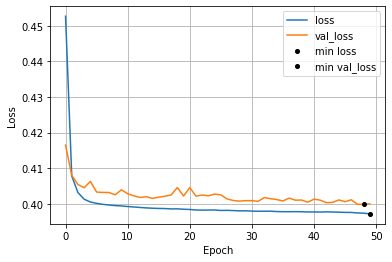

Minimum Loss             : 49    0.397119
Name: loss, dtype: float64

Minimum Validation Loss  : 48    0.399793
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history)

Sweet spot berada di epoch 48 dengan val_loss 0.399793

## **Deep Learning with Deeper Model**

In [ ]:
deeper = Sequential()
deeper.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
deeper.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper.add(Dense(1, kernel_initializer='normal'))

deeper.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
deeper.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 13)                39        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = deeper.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Epoch 1/50
5068/5068 [==============================] - 6s 1ms/step - loss: 0.4090 - val_loss: 0.3762
Epoch 2/50
5068/5068 [==============================] - 6s 1ms/step - loss: 0.3692 - val_loss: 0.3724
Epoch 3/50
5068/5068 [==============================] - 6s 1ms/step - loss: 0.3675 - val_loss: 0.3717
Epoch 4/50
5068/5068 [==============================] - 6s 1ms/step - loss: 0.3667 - val_loss: 0.3710
Epoch 5/50
5068/5068 [==============================] - 6s 1ms/step - loss: 0.3663 - val_loss: 0.3702
Epoch 6/50
5068/5068 [==============================] - 6s 1ms/step - loss: 0.3660 - val_loss: 0.3703
Epoch 7/50
5068/5068 [==============================] - 5s 1ms/step - loss: 0.3657 - val_loss: 0.3702
Epoch 8/50
5068/5068 [==============================] - 5s 1ms/step - loss: 0.3655 - val_loss: 0.3717
Epoch 9/50
5068/5068 [==============================] - 6s 1ms/step - loss: 0.3653 - val_loss: 0.3705
Epoch 10/50
5068/5068 [==============================] - 6s 1ms/step - loss: 0.365

In [ ]:
predict_deep = deeper.predict(X_test)
predict_deep = predict_deep.flatten()

In [ ]:
mse = mean_squared_error(y_test, predict_deep)
mae = mean_absolute_error(y_test, predict_deep)
r2 = r2_score(y_test, predict_deep)
print("MSE (Mean Squared Error)         :", mse)
print("MAE (Mean Absolute Error)        :", mae)
print("r^2 score                        :", r2)
print('RMSE (Root Mean Squared Error)   :', np.sqrt(mean_squared_error(y_test, predict_deep)))

MSE (Mean Squared Error)         : 0.3671206767688389
MAE (Mean Absolute Error)        : 0.4043702394268557
r^2 score                        : 0.6338106271291468
RMSE (Root Mean Squared Error)   : 0.6059048413479124


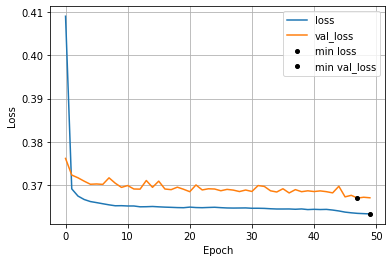

Minimum Loss             : 49    0.363398
Name: loss, dtype: float64

Minimum Validation Loss  : 47    0.367054
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history1)

Sweet spot berada di epoch 47 dengan val_loss 0.367054

## **Deep Learning with Wider Model**

In [ ]:
wider = Sequential()
wider.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider.add(Dense(1, kernel_initializer='normal'))

wider.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
wider.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20)                60        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = wider.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Epoch 1/50
5068/5068 [==============================] - 5s 991us/step - loss: 0.4346 - val_loss: 0.4096
Epoch 2/50
5068/5068 [==============================] - 5s 963us/step - loss: 0.4008 - val_loss: 0.4024
Epoch 3/50
5068/5068 [==============================] - 5s 1000us/step - loss: 0.3984 - val_loss: 0.4021
Epoch 4/50
5068/5068 [==============================] - 5s 976us/step - loss: 0.3977 - val_loss: 0.4009
Epoch 5/50
5068/5068 [==============================] - 5s 977us/step - loss: 0.3975 - val_loss: 0.4004
Epoch 6/50
5068/5068 [==============================] - 5s 984us/step - loss: 0.3971 - val_loss: 0.4008
Epoch 7/50
5068/5068 [==============================] - 5s 984us/step - loss: 0.3969 - val_loss: 0.3997
Epoch 8/50
5068/5068 [==============================] - 5s 993us/step - loss: 0.3967 - val_loss: 0.4003
Epoch 9/50
5068/5068 [==============================] - 5s 985us/step - loss: 0.3965 - val_loss: 0.3994
Epoch 10/50
5068/5068 [==============================] - 5s 982

In [ ]:
predict_wide = wider.predict(X_test)
predict_wide = predict_wide.flatten()

In [ ]:
mse = mean_squared_error(y_test, predict_wide)
mae = mean_absolute_error(y_test, predict_wide)
r2 = r2_score(y_test, predict_wide)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_wide)))

MSE (Mean Squared Error)       : 0.40264859796058816
MAE (Mean Absolute Error)      : 0.4321424813349835
r^2 score                      : 0.598372832409664
RMSE (Root Mean Squared Error  : 0.6345459778145223


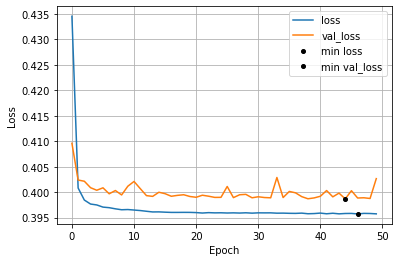

Minimum Loss             : 46    0.395713
Name: loss, dtype: float64

Minimum Validation Loss  : 44    0.398672
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history2)

Sweet spot berada di epoch 44 dengan val_loss 0.398672

## **Deep Learning Wider Model with SGD Optimizer**

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
wider1 = Sequential()
wider1.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider1.add(Dense(1, kernel_initializer='normal'))

opt = SGD(learning_rate=0.001, momentum=0.9)

wider1.compile(loss='mean_squared_error', optimizer=opt)

wider1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                60        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history3 = wider1.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Epoch 1/50
5068/5068 [==============================] - 5s 980us/step - loss: 0.4922 - val_loss: 0.4270
Epoch 2/50
5068/5068 [==============================] - 5s 980us/step - loss: 0.4155 - val_loss: 0.4154
Epoch 3/50
5068/5068 [==============================] - 5s 975us/step - loss: 0.4095 - val_loss: 0.4107
Epoch 4/50
5068/5068 [==============================] - 5s 963us/step - loss: 0.4042 - val_loss: 0.4066
Epoch 5/50
5068/5068 [==============================] - 5s 962us/step - loss: 0.4007 - val_loss: 0.4031
Epoch 6/50
5068/5068 [==============================] - 5s 948us/step - loss: 0.3978 - val_loss: 0.3999
Epoch 7/50
5068/5068 [==============================] - 5s 961us/step - loss: 0.3938 - val_loss: 0.3959
Epoch 8/50
5068/5068 [==============================] - 5s 960us/step - loss: 0.3886 - val_loss: 0.3897
Epoch 9/50
5068/5068 [==============================] - 5s 954us/step - loss: 0.3838 - val_loss: 0.3856
Epoch 10/50
5068/5068 [==============================] - 5s 956u

In [ ]:
predict_sgd = wider1.predict(X_test)
predict_sgd = predict_sgd.flatten()

In [ ]:
mse = mean_squared_error(y_test, predict_sgd)
mae = mean_absolute_error(y_test, predict_sgd)
r2 = r2_score(y_test, predict_sgd)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_sgd)))

MSE (Mean Squared Error)       : 0.37388403488602884
MAE (Mean Absolute Error)      : 0.4072561373203482
r^2 score                      : 0.6270644261544895
RMSE (Root Mean Squared Error  : 0.6114605750872486


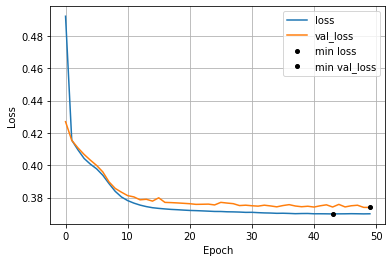

Minimum Loss             : 43    0.369877
Name: loss, dtype: float64

Minimum Validation Loss  : 49    0.373884
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history3)

Sweet spot berada di epoch 49 dengan val_loss 0.373884

## **Deep Learning Wider Model with RMSprop Optimizer**

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
wider2 = Sequential()
wider2.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider2.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(learning_rate=0.001, momentum=0.9)

wider2.compile(loss='mean_squared_error', optimizer=opt)

wider2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 20)                60        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history4 = wider2.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Epoch 1/50
5068/5068 [==============================] - 5s 1ms/step - loss: 0.4094 - val_loss: 0.4021
Epoch 2/50
5068/5068 [==============================] - 5s 1ms/step - loss: 0.4043 - val_loss: 0.4096
Epoch 3/50
5068/5068 [==============================] - 5s 1ms/step - loss: 0.4013 - val_loss: 0.4019
Epoch 4/50
5068/5068 [==============================] - 5s 986us/step - loss: 0.3847 - val_loss: 0.4061
Epoch 5/50
5068/5068 [==============================] - 5s 1ms/step - loss: 0.3792 - val_loss: 0.3901
Epoch 6/50
5068/5068 [==============================] - 5s 991us/step - loss: 0.3777 - val_loss: 0.3787
Epoch 7/50
5068/5068 [==============================] - 5s 995us/step - loss: 0.3768 - val_loss: 0.3800
Epoch 8/50
5068/5068 [==============================] - 5s 991us/step - loss: 0.3769 - val_loss: 0.3821
Epoch 9/50
5068/5068 [==============================] - 5s 990us/step - loss: 0.3751 - val_loss: 0.3931
Epoch 10/50
5068/5068 [==============================] - 5s 993us/step -

In [ ]:
predict_rms = wider2.predict(X_test)
predict_rms = predict_rms.flatten()

In [ ]:
mse = mean_squared_error(y_test, predict_rms)
mae = mean_absolute_error(y_test, predict_rms)
r2 = r2_score(y_test, predict_rms)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_rms)))

MSE (Mean Squared Error)       : 0.37283520518416724
MAE (Mean Absolute Error)      : 0.4212091695229127
r^2 score                      : 0.628110595207547
RMSE (Root Mean Squared Error  : 0.6106023298220924


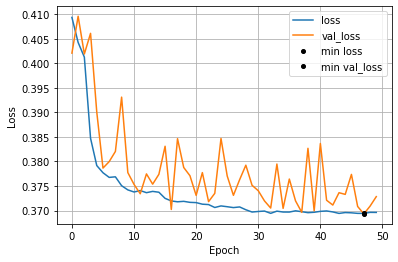

Minimum Loss             : 47    0.369412
Name: loss, dtype: float64

Minimum Validation Loss  : 47    0.369311
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history4)

Sweet spot berada di epoch 47 dengan val_loss 0.369311

## **Kesimpulan**

Dengan versi batch size 128 ini diperoleh

1. R2 score model Linear Regression            : 0.3013722059652524
2. R2 score Deep Learning Model Baseline Layer : 0.601072339036401
3. R2 score Deep Learning Model Deeper Layer   : 0.6338106271291468
4. R2 score Deep Learning Model Wider Layer   : 0.598372832409664
5. R2 score Deep Learning Model Wider Layer SGD Optimizer   : 0.6270644261544895
6. R2 score Deep Learning Model Wider Layer RMSprop Optimizer : 0.628110595207547

Model terbaik adalah model Deep Learning dengan Deeper Layer dan Optimizer Adam walaupun nilai r2 scorenya masih berada di angka 0.63. Dengan penambahan batch size menjadi 128 membuat proses training menjadi lebih cepat namun tidak menjamin hasilnya lebih baik karena seperti terlihat bahwa hasilnya pun masih berada diangka 0.63, tidak berbeda dengan batch size 8. Mungkin dengan penambahan feature bisa meningkatkan nilai r2 scorenya.